In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#=========== general settings ============================#
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.subplot.wspace"] = 0.4

plt.rcParams['font.family'] ='sans-serif'#使用するフォント
plt.rcParams['font.sans-serif'] ='Arial'#使用するフォント
plt.rcParams["font.size"] = 30
#plt.rcParams['mathtext.rm'] ='sans'#使用するフォント
#plt.rcParams['mathtext.default'] ='rm'#使用するフォント

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams["xtick.major.pad"] = 19.0
plt.rcParams["ytick.major.pad"] = 16.0
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["ytick.major.size"] = 10

plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
plt.rcParams["axes.labelpad"] = 10
#==================================================================#

In [3]:
def f(t, X1, X2):
    return X1*t**2 + X2*t

In [4]:
problem = {
    "num_vars": 2,
    "names": ["X1", "X2"],
    "bounds": [[0, 100]*2]
}

In [5]:
param_values = saltelli.sample(problem, 1000)

In [6]:
def S(t):
    t = t
    Y = np.zeros([param_values.shape[0]])
    for i, (X1, X2) in enumerate(param_values):
        Y[i] = f(t, X1, X2)
    Si = sobol.analyze(problem, Y, print_to_console=True)
    return Si

Y = np.zeros([param_values.shape[0]])

for t in (1, 2, 3):
    for i, (X1, X2) in enumerate(param_values):
        Y[i] = f(t, X1, X2)

Si = sobol.analyze(problem, Y, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
X1 0.501194 0.056308 0.498997 0.044702
X2 0.503147 0.056044 0.500569 0.041007

Parameter_1 Parameter_2 S2 S2_conf
X1 X2 -0.004394 0.095770
Parameter S1 S1_conf ST ST_conf
X1 0.501194 0.053166 0.498997 0.039383
X2 0.503147 0.049804 0.500569 0.035902

Parameter_1 Parameter_2 S2 S2_conf
X1 X2 -0.004394 0.089959


<BarContainer object of 2 artists>

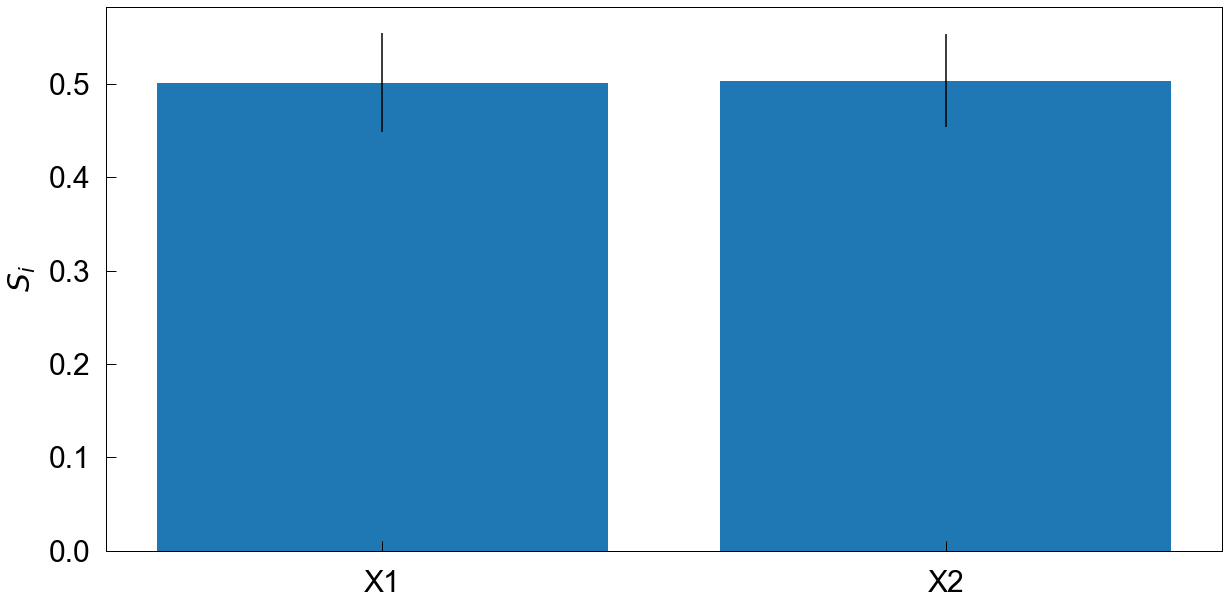

In [7]:
x = np.arange(problem['num_vars'])
plt.xticks(x, problem['names'])
plt.ylabel('$S_{i}$')
plt.bar(x, S(1)['S1'], yerr = S(1)['S1_conf'])

In [11]:
Si

{'S1': array([0.90060339, 0.10179908]),
 'S1_conf': array([0.06630016, 0.02661695]),
 'ST': array([0.89926547, 0.10023309]),
 'ST_conf': array([0.05986902, 0.00981425]),
 'S2': array([[        nan, -0.00267584],
        [        nan,         nan]]),
 'S2_conf': array([[       nan, 0.09069226],
        [       nan,        nan]])}